***Meat Quality Assessment based on Deep Learning***

Authors: O. Ulucan, D. Karakaya, M. Turkan
Department of Electrical and Electronics Engineering, Izmir University of Economics, Izmir, Turkey
Corresponding author: M. Turkan
Contact Information: mehmet.turkan@ieu.edu.tr


***General Introduction***

This dataset contains 2 classes, fresh and spoiled red meat samples collected from a supermarket in Izmir, Turkey
for a university-industry collaboration project at Izmir University of Economics, and this work
was published in ASYU 2019. 

If you use this dataset in your work, please consider to cite:
* O.Ulucan , D.Karakaya and M.Turkan.(2019) Meat quality assessment based on deep learning.
In Conf. Innovations Intell. Syst. Appli. (ASYU)

***Purpose of the work***

This dataset was collected in order to develop a meat quality assessment system which is based on deep learning. 
All of the experimental results which are explained in the paper, prove the usability of our dataset and our model can successfully distinguish between the classes with high accuracy.


***Resolution and the Number of the Images***

Images were collected via an IP camera and the resolution of the images are 1280 x 720. There are 1896 images in total, 948 per class. 

<a id="t1."></a>
# 1. Import data and python packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
# Define paths
train_directory = Path("Beef/Meat/train")
test_directory = Path("Beef/Meat/test")
valid_directory = Path("Beef/Meat/valid")

In [3]:
# Set the desired sample size
sample_size = 1033

# Set the desired width and height for resizing images
width = 224
height = 224

In [4]:
files = ['Fresh', 'Melted']

def load_images(directory, files, sample_size):
    data = {}
    for f in files:
        data[f] = []

    for col in files:
        dir_path = directory / col
        image_files = [file for file in os.listdir(dir_path) if file.endswith('.jpg')]
        
        # Use all images if fewer than sample_size
        if len(image_files) < sample_size:
            selected_files = image_files
        else:
            selected_files = np.random.choice(image_files, sample_size, replace=False)
        
        for file in selected_files:
            data[col].append(os.path.join(dir_path, file))

    image_data = []
    image_target = []

    for title in files:
        for file in data[title]:
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img, (width, height))
            image_data.append(img_resized)
            image_target.append(title)
    
    return np.array(image_data), np.array(image_target)

# Load and preprocess training data
image_train_data, image_train_target = load_images(train_directory, files, sample_size)
image_test_data, image_test_target = load_images(test_directory, files, sample_size)
image_valid_data, image_valid_target = load_images(valid_directory, files, sample_size)

In [5]:
# files = ['Fresh', 'Melted']
# data = {}
# 
# for f in files:
#     data[f] = []
# 
# for col in files:
#     directory = train_directory / col
#     counter = 0
#     for i in os.listdir(directory):
#         if i.endswith('.jpg'):
#             data[col].append(os.path.join(directory, i))
#             counter += 1
#             if counter == sample_size:
#                 break
# 
# start = time.time()
# image_train_data = []
# image_train_target = []
# 
# for title in files:
#     counter = 0
#     for i in data[title]:
#         img = cv2.imread(i)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
#         image_train_data.append(cv2.resize(img, (width, height)))
#         image_train_target.append(title)
#         counter += 1
#         if counter == sample_size:
#             break
#     clear_output(wait=True)
#     print("Compiled Class", title)
# 
# calculate_time = time.time() - start    
# print("Calculate Time", round(calculate_time, 5))
# 
# # Check the number of images collected for each class
# for key, value in data.items():
#     print(f"Number of images for class {key}: {len(value)}")
# 
# # Create a DataFrame
# image_train_data = np.array(image_train_data)
# size_train = image_train_data.shape[0]
# image_train_data.shape

In [6]:
# files = ['Fresh', 'Melted']
# data_test = {}
# 
# for f in files:
#     data_test[f] = []
# 
# for col in files:
#     directory = test_directory / col
#     counter = 0
#     for i in os.listdir(directory):
#         if i.endswith('.jpg'):
#             data_test[col].append(os.path.join(directory, i))
#             counter += 1
#             if counter == sample_size:
#                 break
# 
# start = time.time()
# image_test_data = []
# image_test_target = []
# 
# for title in files:
#     counter = 0
#     for i in data_test[title]:
#         img = cv2.imread(i)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
#         image_test_data.append(cv2.resize(img, (width, height)))
#         image_test_target.append(title)
#         counter += 1
#         if counter == sample_size:
#             break
#     clear_output(wait=True)
#     print("Compiled Class", title)
# 
# calculate_time = time.time() - start    
# print("Calculate Time", round(calculate_time, 5))
# 
# # Check the number of images collected for each class
# for key, value in data_test.items():
#     print(f"Number of images for class {key}: {len(value)}")
# 
# # Create a DataFrame
# image_test_data = np.array(image_test_data)
# size_test = image_test_data.shape[0]
# image_test_data.shape

In [7]:
# files = ['Fresh', 'Melted']
# data_valid = {}
# 
# for f in files:
#     data_valid[f] = []
# 
# for col in files:
#     directory = valid_directory / col
#     counter = 0
#     for i in os.listdir(directory):
#         if i.endswith('.jpg'):
#             data_valid[col].append(os.path.join(directory, i))
#             counter += 1
#             if counter == sample_size:
#                 break
# 
# start = time.time()
# image_valid_data = []
# image_valid_target = []
# 
# for title in files:
#     counter = 0
#     for i in data_valid[title]:
#         img = cv2.imread(i)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
#         image_valid_data.append(cv2.resize(img, (width, height)))
#         image_valid_target.append(title)
#         counter += 1
#         if counter == sample_size:
#             break
#     clear_output(wait=True)
#     print("Compiled Class", title)
# 
# calculate_time = time.time() - start    
# print("Calculate Time", round(calculate_time, 5))
# 
# # Check the number of images collected for each class
# for key, value in data_valid.items():
#     print(f"Number of images for class {key}: {len(value)}")
# 
# # Create a DataFrame
# image_valid_data = np.array(image_valid_data)
# size_valid = image_valid_data.shape[0]
# image_valid_data.shape

In [8]:
# Verify loaded data
print(f"Training data shape: {image_train_data.shape}")
print(f"Training labels shape: {image_train_target.shape}")
print(f"Test data shape: {image_test_data.shape}")
print(f"Test labels shape: {image_test_target.shape}")
print(f"Validation data shape: {image_valid_data.shape}")
print(f"Validation labels shape: {image_valid_target.shape}")

Training data shape: (2066, 224, 224, 3)
Training labels shape: (2066,)
Test data shape: (452, 224, 224, 3)
Test labels shape: (452,)
Validation data shape: (452, 224, 224, 3)
Validation labels shape: (452,)


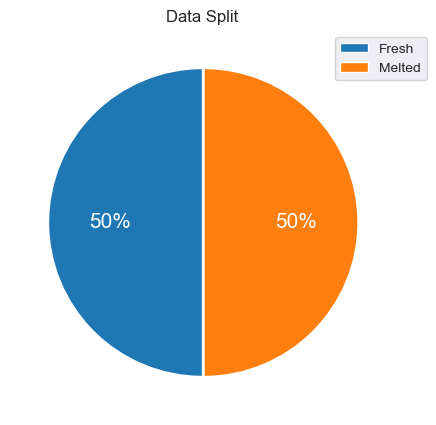

In [9]:
# Plot the data distribution
sizes = [len(image_train_target[image_train_target == 'Fresh']), len(image_train_target[image_train_target == 'Melted'])]

plt.figure(figsize=(10, 5), dpi=100)
plt.pie(x=sizes, autopct='%1.0f%%', shadow=False, textprops={'color':"w", "fontsize":15}, startangle=90, explode=(0, .01))
plt.legend(files, bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

<a id="t2."></a>
# 2. Data visualization

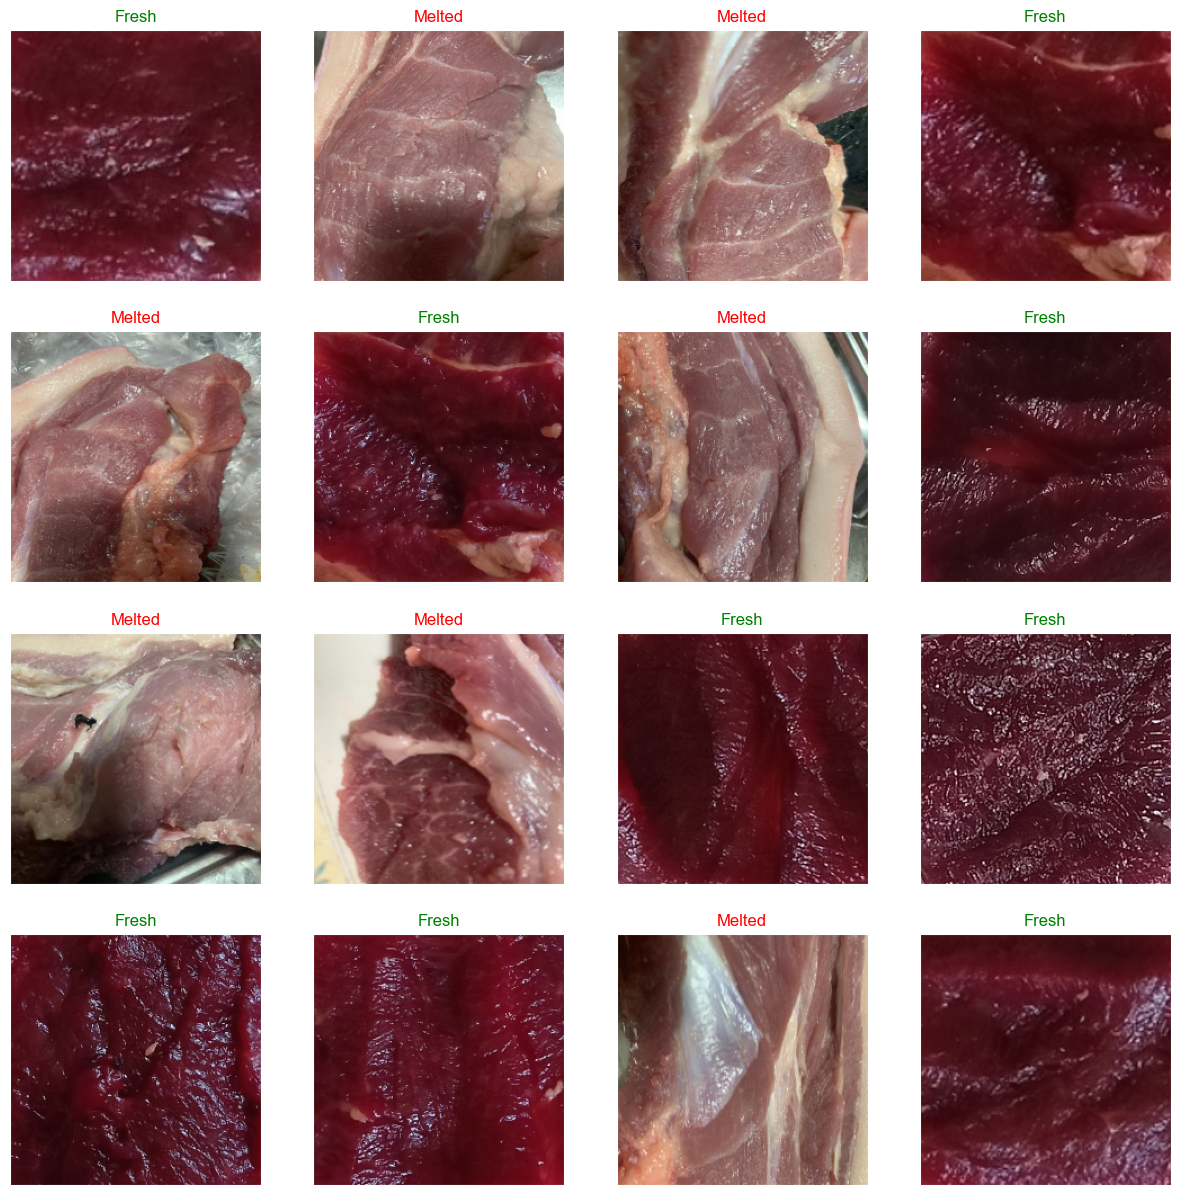

In [10]:
# Define size_train to be the length of image_train_data
size_train = len(image_train_data)

plt.figure(figsize=(15, 15))
for i in range(1, 17):
    fig = np.random.randint(size_train)
    plt.subplot(4, 4, i)
    plt.imshow(image_train_data[fig])
    if image_train_target[fig] == 'Fresh':
        c = 'green'
    else:
        c = 'red'
    plt.title(image_train_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

<a id="t3."></a>
# 3. Classification (CNN)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labels = LabelEncoder()
labels.fit(image_train_target)

LabelEncoder()

In [13]:
# Normalize the images
X_train = image_train_data / 255.0
X_test = image_test_data / 255.0
X_valid = image_valid_data / 255.0

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(image_train_target)
y_test = label_encoder.transform(image_test_target)
y_valid = label_encoder.transform(image_valid_target)

In [14]:


# train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.15, random_state=123)

# #Bagi data menjadi set pelatihan (70%) dan set sementara (30%)
# train_images, temp_images, train_labels, temp_labels = train_test_split(X, y, test_size=0.30, random_state=123)
# 
# #Bagi set sementara menjadi set validasi (15%) dan set pengujian (15%)
# validation_images, test_images, validation_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.50, random_state=123)

# Memeriksa ukuran set
print(f"Train set size: {y_train.shape[0]}")
print(f"Validation set size: {y_valid.shape[0]}")
print(f"Test set size: {y_test.shape[0]}")

Train set size: 2066
Validation set size: 452
Test set size: 452


In [15]:
from tensorflow.keras.utils import to_categorical
    
# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

In [16]:
# train_images, train_labels = X , y
# test_images , test_labels = tX, ty

In [17]:
# Membuat model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [18]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 111, 111, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                        

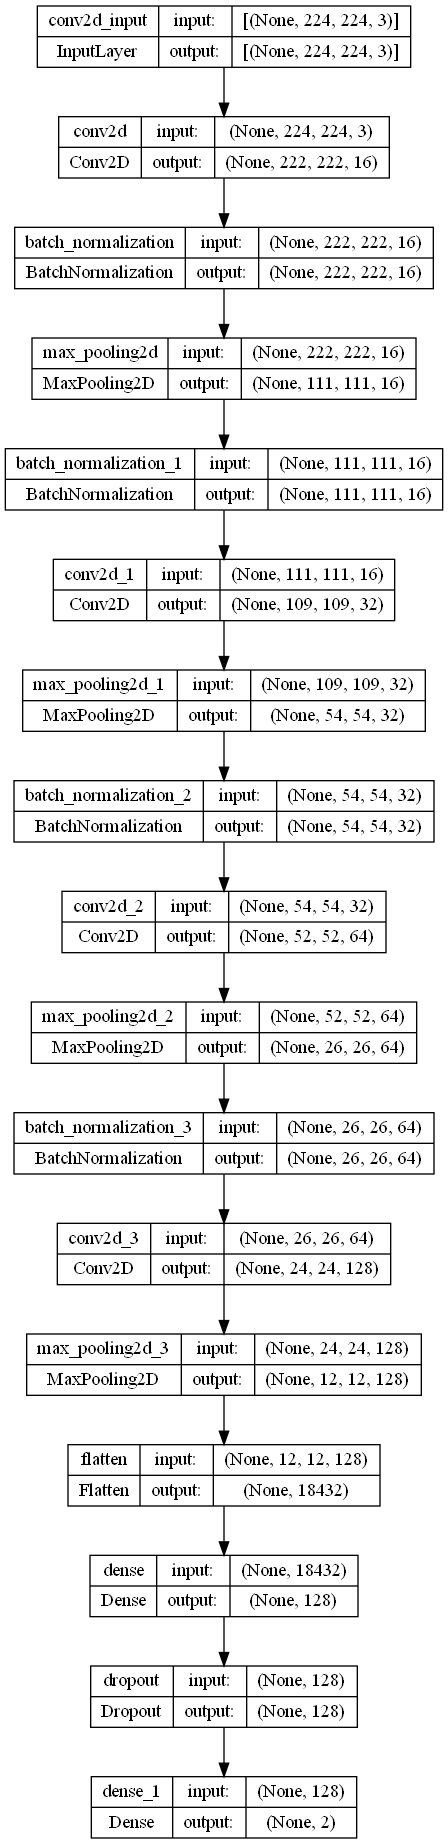

In [20]:
from tensorflow.keras.utils import plot_model

# Menyimpan struktur model ke dalam file gambar
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Call_Back = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model-2.h5', monitor='val_loss', save_best_only=True)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
            print("\nReached or Exceed 99.0% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

In [22]:
# history = model.fit(train_images, 
#                     train_labels,
#                     epochs=10, 
#                     batch_size=32, 
#                     validation_data=(validation_images, validation_labels), callbacks=[early_stopping])

# from sklearn.model_selection import KFold
# 
# kfold = KFold(n_splits=5, shuffle=True, random_state=123)
# for train_index, val_index in kfold.split(X):
#     X_train, X_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
    
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_val, y_val), 
#                     epochs=10, batch_size=32, 
#                     callbacks=[Call_Back, ModelCheckpoint, callback])
    

In [23]:
# from sklearn.preprocessing import LabelEncoder

# # Convert train_labels and test_labels to integers using LabelEncoder
# label_encoder = LabelEncoder()
# train_labels_encoded = label_encoder.fit_transform(train_labels)
# test_labels_encoded = label_encoder.transform(test_labels)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    verbose=1,
    callbacks=[Call_Back, model_checkpoint, callback]
)


Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.9787

C:\Users\raysa\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


65/65 [==============================] - 47s 621ms/step - loss: 0.6782 - accuracy: 0.9787 - val_loss: 0.8171 - val_accuracy: 0.8628
Epoch 2/20
65/65 [==============================] - 35s 541ms/step - loss: 0.1761 - accuracy: 0.9956 - val_loss: 1.2057 - val_accuracy: 0.9270
Epoch 3/20
65/65 [==============================] - 36s 551ms/step - loss: 0.0771 - accuracy: 0.9952 - val_loss: 0.1377 - val_accuracy: 0.9690
Epoch 4/20
65/65 [==============================] - 36s 560ms/step - loss: 0.0165 - accuracy: 0.9971 - val_loss: 0.7012 - val_accuracy: 0.9889
Epoch 5/20
65/65 [==============================] - 31s 482ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7649 - val_accuracy: 0.9889


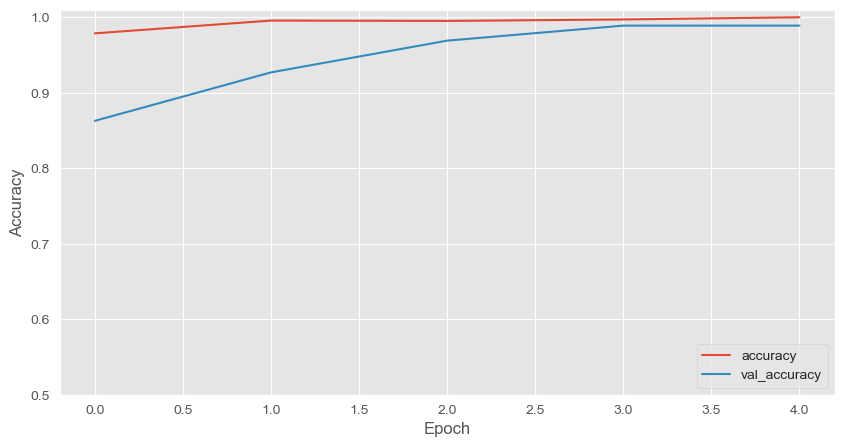

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

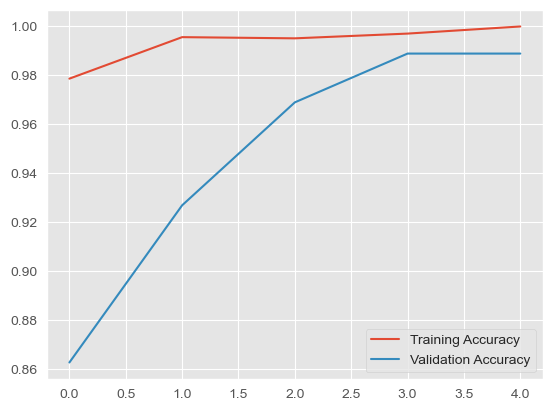

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [26]:
result=model.evaluate(X_test, y_test)

15/15 [==============================] - 3s 169ms/step - loss: 0.2131 - accuracy: 0.9602


In [27]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.21307624876499176
accuracy : 0.9601770043373108


<a id="t4."></a>
# 4. Prediction

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

15/15 [==============================] - 4s 168ms/step


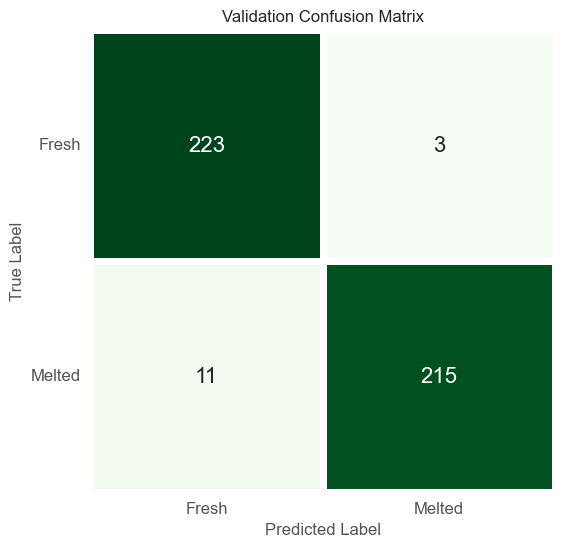

In [29]:
# Prediksi pada data validasi
y_val_pred = model.predict(X_valid)

# Definisi fungsi untuk mengkonversi prediksi ke kelas
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_

# Membuat confusion matrix untuk data validasi
cm_val = confusion_matrix(y_valid, toClass(y_val_pred))

df_val = pd.DataFrame(columns=["Fresh", "Melted"], index=["Fresh", "Melted"], data=cm_val)

f_val, ax_val = plt.subplots(figsize=(6, 6))
sns.heatmap(df_val, annot=True, cmap="Greens", fmt='.0f', ax=ax_val, linewidths=5, cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("True Label")
plt.title("Validation Confusion Matrix", size=12)
plt.show()

15/15 [==============================] - 2s 148ms/step


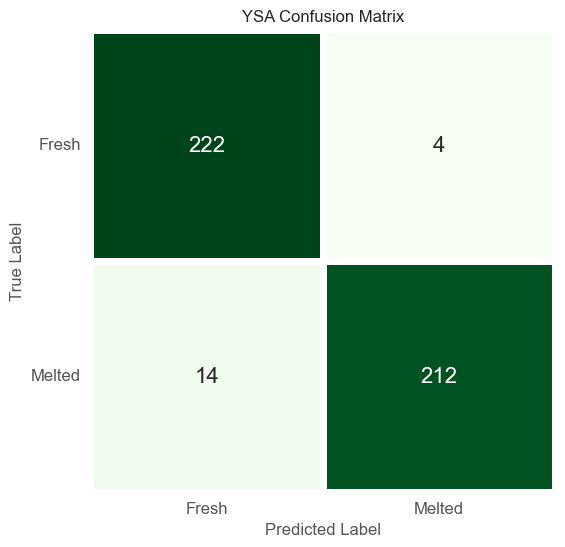

In [30]:
y_pred = model.predict(X_test)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(y_test,toClass(y_pred))

df1 = pd.DataFrame(columns=["Fresh","Melted"], index= ["Fresh","Melted"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [31]:
from sklearn.metrics import classification_report

# Prediksi kelas untuk data uji
y_pred_class = toClass(y_pred)

# Buat classification report
report = classification_report(y_test, y_pred_class, target_names=files)

# Tampilkan classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       Fresh       0.94      0.98      0.96       226
      Melted       0.98      0.94      0.96       226

    accuracy                           0.96       452
   macro avg       0.96      0.96      0.96       452
weighted avg       0.96      0.96      0.96       452


In [32]:
def prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 147ms/step


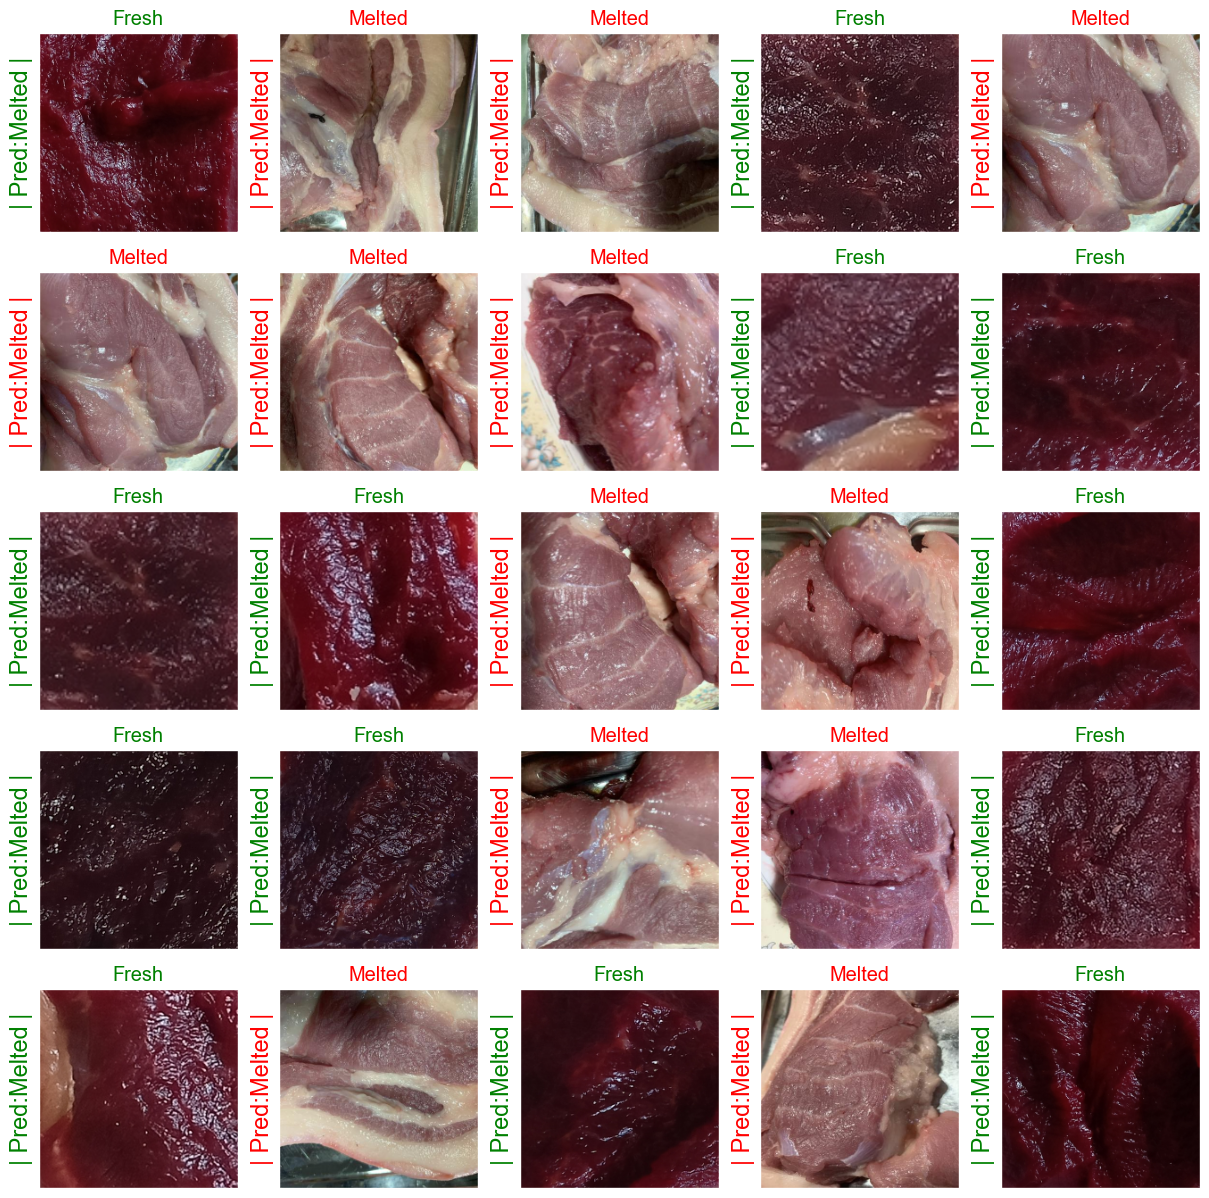

In [33]:
plt.figure(figsize=(15,15))
for i in range(1,26):
    fig = np.random.choice(np.arange(size_train))
    plt.subplot(5,5,i)
    plt.imshow(image_train_data[fig])
    if image_train_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_train_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(prediction(image_train_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()